# ***Data Analysis: 2024 NTCA Legacy T20 - Champions Division***
## Batting, Bowling and Fielding Dataset
### 1. Batting Dataset Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Reading the Dataset:
batting_df = pd.read_excel("C:\\Users\\SHAIFALI PATWAL\\Downloads\\Internship sheets\\2024 NTCA Legacy T20 - Champions Division.xlsx", sheet_name="Batting", header=0)
batting_df.head()


,# ↓,Player ↓,Group ↓,Team ↓,Mat ↓,Ins ↓,No ↓,Runs ↓,Balls ↓,Avg ↓,Sr ↓,Hs ↓,100's ↓,75's ↓,50's ↓,25's ↓,0 ↓,6's ↓,4's ↓
0,1,Dev Jivnani,D,DCCC 1,7,7,1,404,219,67.33,184.47,108,1,2,2,2,0,21,30
1,2,Thouhidul Islam,D,NDCC Royals,9,9,0,356,196,39.56,181.63,100,1,0,2,3,0,19,36
2,3,Sohan Reddy Angannagari,C,Elite Lions,10,10,2,327,202,40.88,161.88,95,0,1,2,2,0,25,24
3,4,Sujith Gowda,C,Frisco Gryffyns,5,4,2,271,147,135.5,184.35,115,1,0,2,1,0,21,14
4,5,Awais Zia,D,DFW Kingsmen,7,7,1,260,180,43.33,144.44,75,0,1,2,3,0,10,30


In [3]:
# Checking the column names:
batting_df.columns

Index(['# ↓', 'Player  ↓', 'Group  ↓', 'Team  ↓', 'Mat  ↓', 'Ins  ↓', 'No  ↓',
       'Runs  ↓', 'Balls  ↓', 'Avg  ↓', 'Sr  ↓', 'Hs  ↓', '100's  ↓',
       '75's  ↓', '50's  ↓', '25's  ↓', '0  ↓', '6's  ↓', '4's  ↓'],
      dtype='object')

In [4]:
# Removing ↓ symbol from the column names
batting_df.columns=batting_df.columns.str.replace("↓","")
batting_df.columns=batting_df.columns.str.strip()
batting_df.columns

Index(['#', 'Player', 'Group', 'Team', 'Mat', 'Ins', 'No', 'Runs', 'Balls',
       'Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's', '4's'],
      dtype='object')

In [5]:
# Setting column 1 as an index
batting_df.set_index(batting_df.columns[0], inplace=True)
batting_df.head(1)

,Player,Group,Team,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's
#,,,,,,,,,,,,,,,,,,
1,Dev Jivnani,D,DCCC 1,7,7,1,404,219,67.33,184.47,108,1,2,2,2,0,21,30


In [6]:
# Checking the missing values and data types
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 1 to 720
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  720 non-null    object 
 1   Group   720 non-null    object 
 2   Team    720 non-null    object 
 3   Mat     720 non-null    int64  
 4   Ins     720 non-null    int64  
 5   No      720 non-null    int64  
 6   Runs    720 non-null    int64  
 7   Balls   720 non-null    int64  
 8   Avg     720 non-null    object 
 9   Sr      720 non-null    float64
 10  Hs      720 non-null    int64  
 11  100's   720 non-null    int64  
 12  75's    720 non-null    int64  
 13  50's    720 non-null    int64  
 14  25's    720 non-null    int64  
 15  0       720 non-null    int64  
 16  6's     720 non-null    int64  
 17  4's     720 non-null    int64  
dtypes: float64(1), int64(13), object(4)
memory usage: 106.9+ KB


In [7]:
# Checking data type of Avg Column
batting_df["Avg"].info()

<class 'pandas.core.series.Series'>
Index: 720 entries, 1 to 720
Series name: Avg
Non-Null Count  Dtype 
--------------  ----- 
720 non-null    object
dtypes: object(1)
memory usage: 11.2+ KB


In [8]:
# Converting data type of Avg column from Object to float
batting_df['Avg'] = pd.to_numeric(batting_df['Avg'], errors='coerce')

In [9]:
# Checking the null values in each column
print("\nMissing Values in Batting Dataset:")
batting_df.isnull().sum()
# no null values available in the dataset


Missing Values in Batting Dataset:


Player      0
Group       0
Team        0
Mat         0
Ins         0
No          0
Runs        0
Balls       0
Avg       195
Sr          0
Hs          0
100's       0
75's        0
50's        0
25's        0
0           0
6's         0
4's         0
dtype: int64

In [10]:
batting_df["Avg"].info()

<class 'pandas.core.series.Series'>
Index: 720 entries, 1 to 720
Series name: Avg
Non-Null Count  Dtype  
--------------  -----  
525 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [11]:
# Filling null values : First manually calculating the Average and replacing the current values of the column with the new values
batting_df['Avg'] = batting_df['Runs'] / (batting_df['Ins'] - batting_df['No'])
batting_df.head()

,Player,Group,Team,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's
#,,,,,,,,,,,,,,,,,,
1,Dev Jivnani,D,DCCC 1,7,7,1,404,219,67.333333,184.47,108,1,2,2,2,0,21,30
2,Thouhidul Islam,D,NDCC Royals,9,9,0,356,196,39.555556,181.63,100,1,0,2,3,0,19,36
3,Sohan Reddy Angannagari,C,Elite Lions,10,10,2,327,202,40.875000,161.88,95,0,1,2,2,0,25,24
4,Sujith Gowda,C,Frisco Gryffyns,5,4,2,271,147,135.500000,184.35,115,1,0,2,1,0,21,14
5,Awais Zia,D,DFW Kingsmen,7,7,1,260,180,43.333333,144.44,75,0,1,2,3,0,10,30


In [12]:
# Again checking the null values
batting_df["Avg"].isna().sum()

124

In [13]:
# Filling null values with 0
batting_df["Avg"].fillna(0, inplace=True)

C:\Users\SHAIFALI PATWAL\AppData\Local\Temp\ipykernel_18276\2364891039.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batting_df["Avg"].fillna(0, inplace=True)


In [14]:
batting_df.describe()

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2.883333,2.155556,0.448611,35.798611,28.590278,inf,86.236736,19.815278,0.015278,0.026389,0.147222,0.333333,0.190278,1.413889,2.781944
std,2.040003,1.930135,0.709658,53.847461,36.844675,NaN,61.470124,23.789949,0.122741,0.168849,0.460384,0.650238,0.439579,2.971038,5.019401
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,3.000000,1.000,29.642500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,14.500000,15.000000,11.875,96.190000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,1.000000,46.000000,39.000000,28.375,131.580000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000
max,10.000000,10.000000,4.000000,404.000000,219.000000,inf,333.330000,129.000000,1.000000,2.000000,3.000000,4.000000,2.000000,25.000000,36.000000


In [15]:
# Check for infinity values in the dataframe
import numpy as np
np.isinf(batting_df["Avg"]).sum()

71

In [16]:
# Replacing infinity valuess with 0
batting_df["Avg"].replace([np.inf, -np.inf], np.nan, inplace=True)
np.isinf(batting_df["Avg"]).sum()

C:\Users\SHAIFALI PATWAL\AppData\Local\Temp\ipykernel_18276\1654418175.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batting_df["Avg"].replace([np.inf, -np.inf], np.nan, inplace=True)


0

In [17]:
# Descriptive Analytics:
batting_df.describe()

,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's
count,720.000000,720.000000,720.000000,720.000000,720.000000,649.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2.883333,2.155556,0.448611,35.798611,28.590278,14.352146,86.236736,19.815278,0.015278,0.026389,0.147222,0.333333,0.190278,1.413889,2.781944
std,2.040003,1.930135,0.709658,53.847461,36.844675,16.965183,61.470124,23.789949,0.122741,0.168849,0.460384,0.650238,0.439579,2.971038,5.019401
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,29.642500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,14.500000,15.000000,9.666667,96.190000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,1.000000,46.000000,39.000000,21.333333,131.580000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000
max,10.000000,10.000000,4.000000,404.000000,219.000000,156.000000,333.330000,129.000000,1.000000,2.000000,3.000000,4.000000,2.000000,25.000000,36.000000


In [18]:
# Checking Unique Team names
batting_df['Team'].unique()

array(['\xa0DCCC 1', '\xa0NDCC Royals', '\xa0Elite Lions',
       '\xa0Frisco Gryffyns', '\xa0DFW Kingsmen', '\xa0Spartans T20',
       '\xa0DFW Kingsmen 2', '\xa0Pcc Reds', '\xa0GPCC Gladiators',
       '\xa0Frisco Cobras', '\xa0McKinney Lazy Cricketers',
       '\xa0Pcc Googlies', '\xa0Lanka Colts Cowboys', '\xa0Hawks',
       '\xa0Soaring Eagles', '\xa0Metroplex', '\xa0FCG Maharajas',
       '\xa0Somerset Stars', '\xa0FCG Badshahz', '\xa0Eagles-Tigers',
       '\xa0Elite Pumas', '\xa0MNCC SunRisers', '\xa0Galacticos T20',
       '\xa0DCCC 2', '\xa0PCA I', '\xa0Pcc Cubs', '\xa0Irving Blues',
       '\xa0Irving Whites'], dtype=object)

In [19]:
# Replacing \xao from the dataset values
batting_df = batting_df.replace(u'\xa0', u'', regex=True)

In [20]:
batting_df['Team'] = batting_df['Team'].str.replace('\xa0', '')
batting_df['Team']=batting_df['Team'].str.strip()
batting_df['Team'].unique()

array(['DCCC 1', 'NDCC Royals', 'Elite Lions', 'Frisco Gryffyns',
       'DFW Kingsmen', 'Spartans T20', 'DFW Kingsmen 2', 'Pcc Reds',
       'GPCC Gladiators', 'Frisco Cobras', 'McKinney Lazy Cricketers',
       'Pcc Googlies', 'Lanka Colts Cowboys', 'Hawks', 'Soaring Eagles',
       'Metroplex', 'FCG Maharajas', 'Somerset Stars', 'FCG Badshahz',
       'Eagles-Tigers', 'Elite Pumas', 'MNCC SunRisers', 'Galacticos T20',
       'DCCC 2', 'PCA I', 'Pcc Cubs', 'Irving Blues', 'Irving Whites'],
      dtype=object)

In [21]:
# Checking the  number of players from each team participating in Champoionship division
batting_df['Team'].value_counts().head(5)

Team
DFW Kingsmen      35
Pcc Googlies      32
DCCC 2            32
Galacticos T20    31
FCG Badshahz      31
Name: count, dtype: int64

**Data Visualization**

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


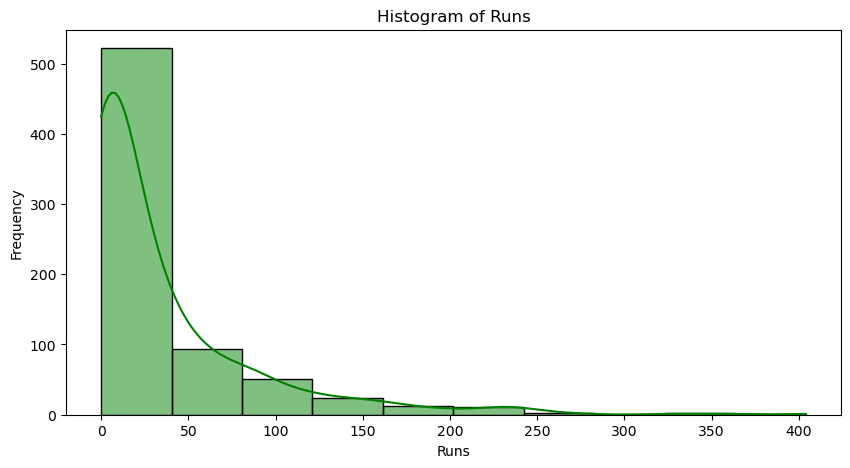

In [22]:
# 1. Histogram of Runs
plt.figure(figsize=(10, 5))
sns.histplot(batting_df['Runs'], bins=10, kde=True, color='green')
plt.title('Histogram of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# The histogram showes the data is skewed to the right which shows
# mean is greater then the median.
# It indicates that most of the data points are clusted on the left side 
# with a few extreme values pulling the average (mean) higher 
# than the median; essentially, the majority of data is smaller
#  than the average value, with a few significantly larger outliers on the right side.


In [23]:
# Maxinmum matches played in the tournament
batting_df['Mat'].max() 


10

In [24]:
# Created a dataframe df of players who played min 4 matches and min 4 innings sorted by the runs scored
df= batting_df[(batting_df['Mat']>=5) & (batting_df['Ins']>=5)][['Player','Team','Mat','Ins','Runs','Balls','Avg']].sort_values("Runs", ascending=False).head(20)
df

,Player,Team,Mat,Ins,Runs,Balls,Avg
#,,,,,,,
1,Dev Jivnani,DCCC 1,7,7,404,219,67.333333
2,Thouhidul Islam,NDCC Royals,9,9,356,196,39.555556
3,Sohan Reddy Angannagari,Elite Lions,10,10,327,202,40.875000
5,Awais Zia,DFW Kingsmen,7,7,260,180,43.333333
6,Hemnath Prabhakaran,Spartans T20,6,6,243,146,40.500000
7,Muhammad Waqas Saleem,DFW Kingsmen 2,5,5,240,176,48.000000
8,Aneesh Reddy Musugu,DCCC 1,7,7,239,172,47.800000
9,Srikanth Gutlapalli,Pcc Reds,7,7,238,179,34.000000
10,Sainath Yasani,Elite Lions,10,8,236,143,33.714286


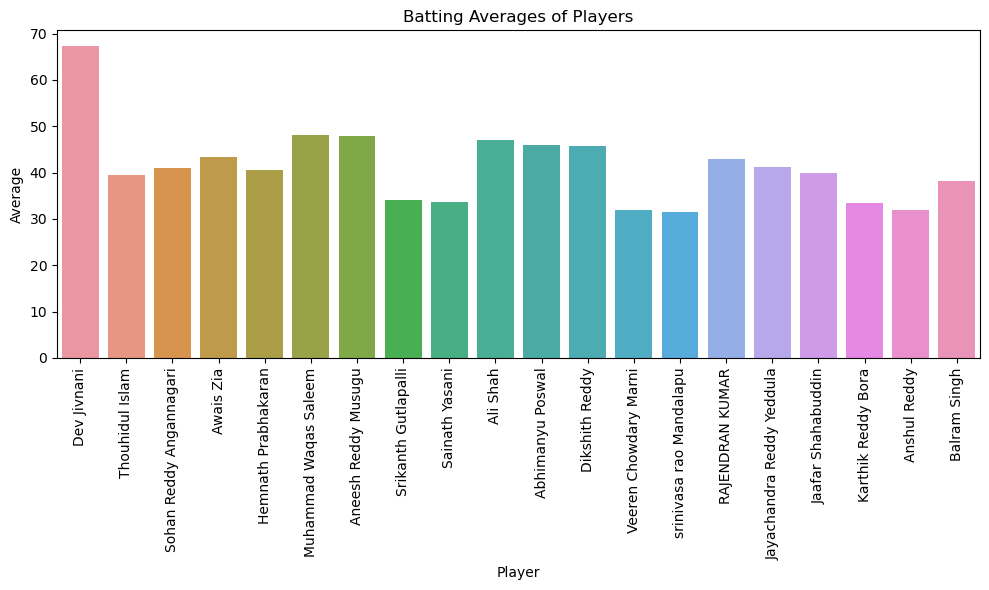

In [25]:
# Visualizing Batting Average of players who played min 4 matches and min 4 innings sorted by runs 
plt.figure(figsize=(10,6))
sns.barplot(x="Player",y="Avg", data=df)
plt.title('Batting Averages of Players')
plt.ylabel('Average')
plt.xlabel('Player')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

**Feature Engineering**

In [26]:
# Feature Engineering
# Calculating boundary percentage:
batting_df["Boundary%"]=((batting_df['6\'s'] * 6) + (batting_df['4\'s'] * 4)) / batting_df['Runs'] * 100
batting_df.head(2)

,Player,Group,Team,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's,Boundary%
#,,,,,,,,,,,,,,,,,,,
1,Dev Jivnani,D,DCCC 1,7,7,1,404,219,67.333333,184.47,108,1,2,2,2,0,21,30,60.891089
2,Thouhidul Islam,D,NDCC Royals,9,9,0,356,196,39.555556,181.63,100,1,0,2,3,0,19,36,72.471910


In [27]:
batting_df.describe()

,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's,Boundary%
count,720.000000,720.000000,720.000000,720.000000,720.000000,649.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,562.000000
mean,2.883333,2.155556,0.448611,35.798611,28.590278,14.352146,86.236736,19.815278,0.015278,0.026389,0.147222,0.333333,0.190278,1.413889,2.781944,38.524278
std,2.040003,1.930135,0.709658,53.847461,36.844675,16.965183,61.470124,23.789949,0.122741,0.168849,0.460384,0.650238,0.439579,2.971038,5.019401,27.754442
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,29.642500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,14.500000,15.000000,9.666667,96.190000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.818182
75%,4.000000,3.000000,1.000000,46.000000,39.000000,21.333333,131.580000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,59.942529
max,10.000000,10.000000,4.000000,404.000000,219.000000,156.000000,333.330000,129.000000,1.000000,2.000000,3.000000,4.000000,2.000000,25.000000,36.000000,100.000000


## Bowling Data Analysis

In [28]:
bowling_df= pd.read_excel("C:\\Users\\SHAIFALI PATWAL\\Downloads\\Internship sheets\\2024 NTCA Legacy T20 - Champions Division.xlsx", sheet_name="Bowling", header=0)
bowling_df.head(1)

,# ↓,Player ↓,Group ↓,Team ↓,Mat ↓,Inns ↓,Overs ↓,Runs ↓,Wkts ↓,BBf ↓,Mdns ↓,Dots ↓,Econ ↓,Ave ↓,SR ↓,Hat-trick ↓,4W ↓,5W ↓,Wides ↓,Nb ↓
0,1,Naren Reddy Dharma,C,Elite Lions,9,9,31.0,162,17,26/ 4,0,99,5.23,9.53,10.9,0,1,0,7,0


In [29]:
# Replacing ↓ from the column names
bowling_df.columns=bowling_df.columns.str.replace("↓","")
bowling_df.columns=bowling_df.columns.str.strip()
bowling_df.columns

Index(['#', 'Player', 'Group', 'Team', 'Mat', 'Inns', 'Overs', 'Runs', 'Wkts',
       'BBf', 'Mdns', 'Dots', 'Econ', 'Ave', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb'],
      dtype='object')

In [30]:
# Setting column 0 as an index
bowling_df.set_index(bowling_df.columns[0], inplace=True)
bowling_df.head(1)

,Player,Group,Team,Mat,Inns,Overs,Runs,Wkts,BBf,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb
#,,,,,,,,,,,,,,,,,,,
1,Naren Reddy Dharma,C,Elite Lions,9,9,31.0,162,17,26/ 4,0,99,5.23,9.53,10.9,0,1,0,7,0


In [31]:
# Removing \xa0 from the dataset values
bowling_df = bowling_df.replace(u'\xa0', u'', regex=True)
bowling_df["Mat"].unique()

array([ 9,  7,  6,  4,  5,  8,  3,  2,  1, 10], dtype=int64)

In [32]:
# Checking  the data type of each column
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476 entries, 1 to 476
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     476 non-null    object 
 1   Group      476 non-null    object 
 2   Team       476 non-null    object 
 3   Mat        476 non-null    int64  
 4   Inns       476 non-null    int64  
 5   Overs      476 non-null    float64
 6   Runs       476 non-null    int64  
 7   Wkts       476 non-null    int64  
 8   BBf        476 non-null    object 
 9   Mdns       476 non-null    int64  
 10  Dots       476 non-null    int64  
 11  Econ       476 non-null    float64
 12  Ave        476 non-null    float64
 13  SR         476 non-null    float64
 14  Hat-trick  476 non-null    int64  
 15  4W         476 non-null    int64  
 16  5W         476 non-null    int64  
 17  Wides      476 non-null    int64  
 18  Nb         476 non-null    int64  
dtypes: float64(4), int64(11), object(4)
memory usage: 74.4+

In [33]:
# Checking number of null values in each column
bowling_df.isna().sum()

Player       0
Group        0
Team         0
Mat          0
Inns         0
Overs        0
Runs         0
Wkts         0
BBf          0
Mdns         0
Dots         0
Econ         0
Ave          0
SR           0
Hat-trick    0
4W           0
5W           0
Wides        0
Nb           0
dtype: int64

In [34]:
# Checking rows and columns of bowling dataset
bowling_df.shape

(476, 19)

In [35]:
bowling_df['Mat'].max() #Max number of matches played

10

In [36]:
# Creating a dataframe of players who played minimum 5 matches and minimum 4 innings sort by wickets 
# Dataframe b1 include Player name, Overs, Runs, Econ and wikets
b1=bowling_df[(bowling_df["Mat"]>=5) & (bowling_df['Inns']>=4)][["Player","Overs","Runs","Wkts","Econ"]].sort_values("Wkts",ascending=False)
b1.head(5)

,Player,Overs,Runs,Wkts,Econ
#,,,,,
1,Naren Reddy Dharma,31.0,162,17,5.23
4,Siddantham Praneeth Raj,25.0,151,13,6.04
2,Muhammad Ilyas,24.4,136,13,5.51
3,Omer Wajihuddin Syed,23.4,134,13,5.66
7,Sauman Basu,20.0,171,11,8.55


In [37]:
b1.sort_values(by=["Wkts","Overs"],ascending=False).head()

,Player,Overs,Runs,Wkts,Econ
#,,,,,
1,Naren Reddy Dharma,31.0,162,17,5.23
4,Siddantham Praneeth Raj,25.0,151,13,6.04
2,Muhammad Ilyas,24.4,136,13,5.51
3,Omer Wajihuddin Syed,23.4,134,13,5.66
6,Abhimanyu Poswal,25.0,164,11,6.56


In [38]:
# Creating a dataframe of players who played minimum 4 innings and have econ less than 6
b2= bowling_df[(bowling_df["Inns"]>=5)&(bowling_df["Econ"]<6)][["Player","Mat","Overs","Runs","Wkts","Econ"]].head(10)
b2

,Player,Mat,Overs,Runs,Wkts,Econ
#,,,,,,
1,Naren Reddy Dharma,9,31.0,162,17,5.23
2,Muhammad Ilyas,7,24.4,136,13,5.51
3,Omer Wajihuddin Syed,6,23.4,134,13,5.66
8,Sapan Sharma,5,18.0,99,10,5.50
18,Muhammad Waqas Saleem,7,20.0,114,8,5.70
24,Aakarshit Gomel,5,14.0,65,7,4.64
26,Aasish Jaiswal,7,22.0,127,7,5.77
55,Aneesh Reddy Musugu,7,13.0,72,5,5.54
57,Sandeep Vilayanur Sivaram,5,18.0,105,5,5.83


In [39]:
bowling_df.describe()

,Mat,Inns,Overs,Runs,Wkts,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,3.115546,2.539916,7.133824,57.642857,2.321429,0.065126,17.102941,8.744769,19.437647,14.118908,0.004202,0.042017,0.010504,3.273109,0.241597
std,2.071686,1.770068,5.925276,44.965327,2.638908,0.255389,16.332335,3.213070,20.902005,14.119565,0.091670,0.200839,0.102058,3.472144,0.641079
min,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,21.000000,0.000000,0.000000,5.000000,6.677500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,2.000000,5.000000,43.500000,1.000000,0.000000,11.000000,8.285000,15.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.000000,4.000000,10.000000,83.000000,3.250000,0.000000,24.000000,10.250000,28.177500,20.250000,0.000000,0.000000,0.000000,5.000000,0.000000
max,10.000000,9.000000,31.000000,210.000000,17.000000,2.000000,99.000000,24.000000,158.000000,96.000000,2.000000,1.000000,1.000000,18.000000,5.000000


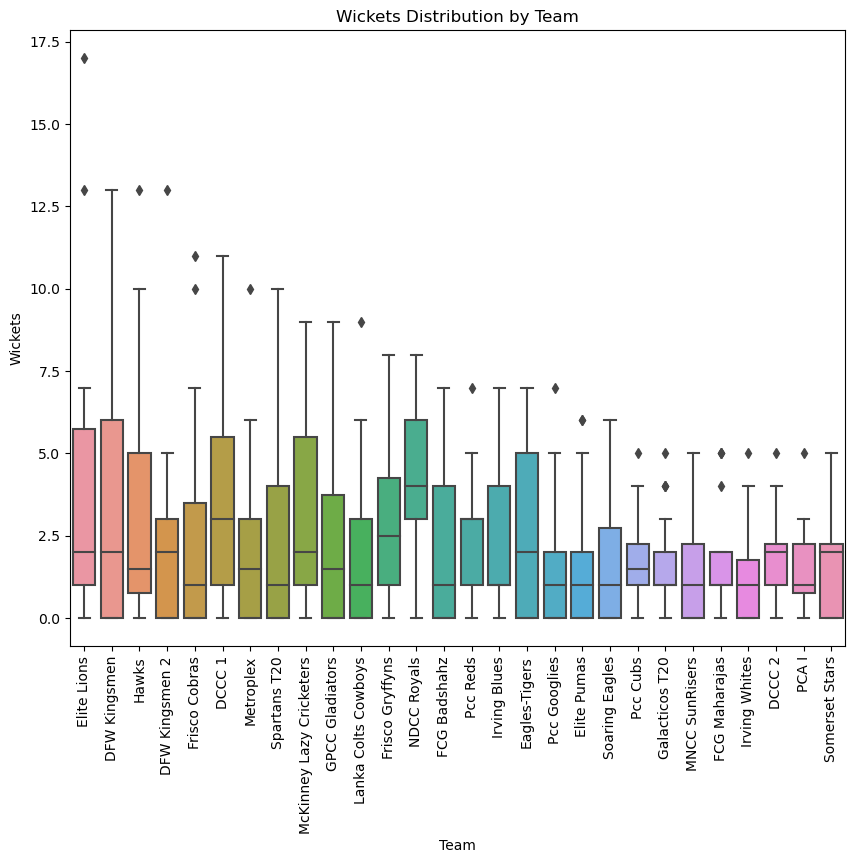

In [40]:
# Box Plot: Wickets Distribution by Team in bowling data
plt.figure(figsize=(10, 8))
sns.boxplot(x='Team', y='Wkts', data=bowling_df)
plt.title('Wickets Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Wickets')
plt.xticks(rotation=90)
plt.show()

In [41]:
# Bowling: Calculating the efficiency ratio (wickets per run given)
bowling_df['Efficiency'] = bowling_df['Wkts'] / bowling_df['Runs']
bowling_df.head(2)

,Player,Group,Team,Mat,Inns,Overs,Runs,Wkts,BBf,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb,Efficiency
#,,,,,,,,,,,,,,,,,,,,
1,Naren Reddy Dharma,C,Elite Lions,9,9,31.0,162,17,26/4,0,99,5.23,9.53,10.9,0,1,0,7,0,0.104938
2,Muhammad Ilyas,D,DFW Kingsmen,7,7,24.4,136,13,20/4,0,78,5.51,10.46,11.4,2,1,0,7,4,0.095588


In [42]:
# Summary statistics
bowling_df.describe()

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Mat,Inns,Overs,Runs,Wkts,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb,Efficiency
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,3.115546,2.539916,7.133824,57.642857,2.321429,0.065126,17.102941,8.744769,19.437647,14.118908,0.004202,0.042017,0.010504,3.273109,0.241597,inf
std,2.071686,1.770068,5.925276,44.965327,2.638908,0.255389,16.332335,3.213070,20.902005,14.119565,0.091670,0.200839,0.102058,3.472144,0.641079,NaN
min,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,21.000000,0.000000,0.000000,5.000000,6.677500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,2.000000,5.000000,43.500000,1.000000,0.000000,11.000000,8.285000,15.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.031746
75%,5.000000,4.000000,10.000000,83.000000,3.250000,0.000000,24.000000,10.250000,28.177500,20.250000,0.000000,0.000000,0.000000,5.000000,0.000000,0.061303
max,10.000000,9.000000,31.000000,210.000000,17.000000,2.000000,99.000000,24.000000,158.000000,96.000000,2.000000,1.000000,1.000000,18.000000,5.000000,inf


## 3. Fielding Data Analysis

In [43]:
fielding_df= pd.read_excel("C:\\Users\\SHAIFALI PATWAL\\Downloads\\Internship sheets\\2024 NTCA Legacy T20 - Champions Division.xlsx", sheet_name="Fielding", header=0)
fielding_df.head(10)

,# ↓,Player ↓,Group ↓,Team ↓,Catches ↓,WK Catches ↓,Direct RO ↓,Indirect RO ↓,Stumpings ↓,Total ↓
0,1,Saikiran Valaboju,B,Frisco Cobras,11,0,0,0,0,11
1,2,Sainath Yasani,C,Elite Lions,0,7,0,0,4,11
2,3,Thouhidul Islam,D,NDCC Royals,2,5,1,0,2,10
3,4,Kireeti Eluri,A,Pcc Googlies,0,4,0,4,2,10
4,5,Ali Sheikh,D,DFW Kingsmen,8,0,1,0,0,9
5,6,Shashank Singh,B,FCG Badshahz,1,6,0,0,2,9
6,7,Naeem Qureshi,D,DFW Kingsmen,0,6,0,1,2,9
7,8,Sharath Dwaram,A,Hawks,0,5,0,0,4,9
8,9,Dikshith Reddy,C,Elite Lions,7,0,1,0,0,8
9,10,Awais Zia,D,DFW Kingsmen,6,0,0,1,0,7


In [44]:
fielding_df.columns=fielding_df.columns.str.replace('↓','')
fielding_df.columns=fielding_df.columns.str.strip()
fielding_df.columns

Index(['#', 'Player', 'Group', 'Team', 'Catches', 'WK Catches', 'Direct RO',
       'Indirect RO', 'Stumpings', 'Total'],
      dtype='object')

In [45]:
fielding_df.set_index(fielding_df.columns[0], inplace=True)
fielding_df.head(1)

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total
#,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,11,0,0,0,0,11


In [46]:
fielding_df = fielding_df.replace(u'\xa0', u'', regex=True)
fielding_df["Team"].unique()

array(['Frisco Cobras', 'Elite Lions', 'NDCC Royals', 'Pcc Googlies',
       'DFW Kingsmen', 'FCG Badshahz', 'Hawks', 'DCCC 1', 'Spartans T20',
       'DFW Kingsmen 2', 'DCCC 2', 'Metroplex', 'Elite Pumas',
       'McKinney Lazy Cricketers', 'Irving Whites', 'PCA I',
       'GPCC Gladiators', 'Pcc Reds', 'Lanka Colts Cowboys',
       'FCG Maharajas', 'Irving Blues', 'Somerset Stars',
       'Frisco Gryffyns', 'Eagles-Tigers', 'Galacticos T20', 'Pcc Cubs',
       'Soaring Eagles', 'MNCC SunRisers'], dtype=object)

In [47]:
fielding_df.shape

(720, 9)

In [48]:
fielding_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 1 to 720
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player       720 non-null    object
 1   Group        720 non-null    object
 2   Team         720 non-null    object
 3   Catches      720 non-null    int64 
 4   WK Catches   720 non-null    int64 
 5   Direct RO    720 non-null    int64 
 6   Indirect RO  720 non-null    int64 
 7   Stumpings    720 non-null    int64 
 8   Total        720 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 56.2+ KB


In [49]:
fielding_df.isna().sum()

Player         0
Group          0
Team           0
Catches        0
WK Catches     0
Direct RO      0
Indirect RO    0
Stumpings      0
Total          0
dtype: int64

In [50]:
fielding_df.columns

Index(['Player', 'Group', 'Team', 'Catches', 'WK Catches', 'Direct RO',
       'Indirect RO', 'Stumpings', 'Total'],
      dtype='object')

In [51]:
# Varifying if Total column is equal to the sum of Catches,WK Catches,Direct RO, Indirect RO and Stumping
fielding_df["Calculated_Total"]=fielding_df["Catches"]+fielding_df["WK Catches"]+fielding_df["Direct RO"]+fielding_df["Indirect RO"]+fielding_df["Stumpings"]
fielding_df.head(3)

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Calculated_Total
#,,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,11,0,0,0,0,11,11
2,Sainath Yasani,C,Elite Lions,0,7,0,0,4,11,11
3,Thouhidul Islam,D,NDCC Royals,2,5,1,0,2,10,10


In [52]:
# Check if there are discrepancies
discrepancies = fielding_df[fielding_df['Total'] != fielding_df['Calculated_Total']]
discrepancies
# both are same so we'll drop the new column

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Calculated_Total
#,,,,,,,,,,


In [53]:
# Removing Calculated_Total column from the dataset
fielding_df=fielding_df.drop("Calculated_Total",axis=1)

In [54]:
# Checking the max number of catches
fielding_df['Catches'].max()

11

In [55]:
# Checking the maximum numbers of wicket keeper catches
fielding_df['WK Catches'].max()

7

In [56]:
# Players with catches more than 2 and total more than 5
fdf= fielding_df[(fielding_df['Catches']>=3) & (fielding_df['Total']>=6)][["Player","Catches","Total"]]
fdf

,Player,Catches,Total
#,,,
1,Saikiran Valaboju,11,11
5,Ali Sheikh,8,9
9,Dikshith Reddy,7,8
10,Awais Zia,6,7
13,Naren Reddy Dharma,4,7
15,Abdullah Khan,6,6
16,Viral Nai,6,6
17,Baswant Rao,6,6
18,Muhammad Waqas Saleem,6,6


In [57]:
# Sorting values by Total wickets
fielding_df.sort_values(by="Total", ascending=False).head(10)

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total
#,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,11,0,0,0,0,11
2,Sainath Yasani,C,Elite Lions,0,7,0,0,4,11
3,Thouhidul Islam,D,NDCC Royals,2,5,1,0,2,10
4,Kireeti Eluri,A,Pcc Googlies,0,4,0,4,2,10
5,Ali Sheikh,D,DFW Kingsmen,8,0,1,0,0,9
6,Shashank Singh,B,FCG Badshahz,1,6,0,0,2,9
7,Naeem Qureshi,D,DFW Kingsmen,0,6,0,1,2,9
8,Sharath Dwaram,A,Hawks,0,5,0,0,4,9
9,Dikshith Reddy,C,Elite Lions,7,0,1,0,0,8


In [58]:
# Summary statistics
fielding_df.describe()

,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.888889,0.143056,0.116667,0.083333,0.068056,1.300000
std,1.288178,0.685905,0.365783,0.331474,0.394089,1.743336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,11.000000,7.000000,3.000000,4.000000,4.000000,11.000000


c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


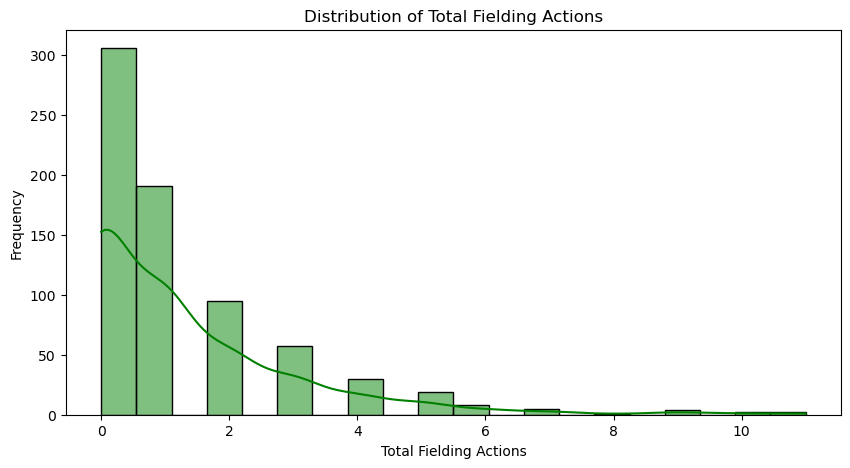

In [59]:
# Histogram of Total fielding actions
plt.figure(figsize=(10, 5))
sns.histplot(fielding_df['Total'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Fielding Actions')
plt.xlabel('Total Fielding Actions')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Checking number of wickets taken by NDCC Royals team
fielding_df[fielding_df["Team"]=='NDCC Royals']['Total'].sum()

49

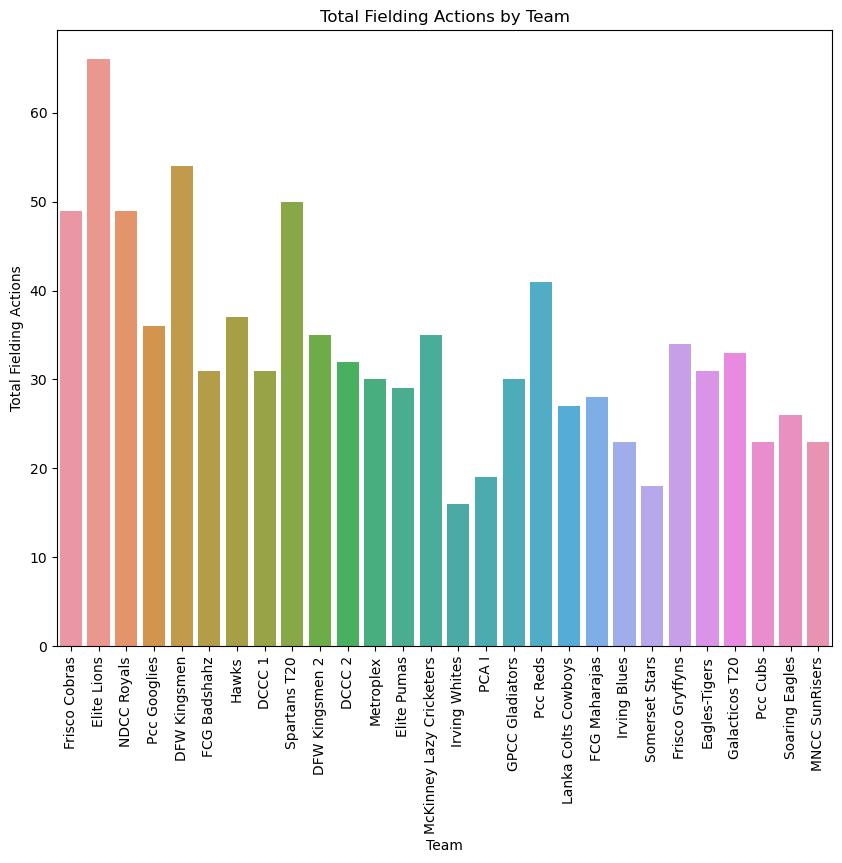

In [61]:
# bar plot of total fielding actions by team: total wickets taken by each team
plt.figure(figsize=(10,8))
sns.barplot(x="Team",y="Total", data=fielding_df, estimator=sum, errorbar=None)
plt.title('Total Fielding Actions by Team')
plt.xlabel('Team')
plt.ylabel('Total Fielding Actions')
plt.xticks(rotation=90)
plt.show()

In [62]:
# Creating new features: 
# Fielding Efficiency and Keeper Contribution

fielding_df['Fielding_Efficiency'] = (fielding_df['Catches'] + fielding_df['Direct RO'] + fielding_df['Indirect RO'] + fielding_df['Stumpings']) / fielding_df['Total']
fielding_df['Keeper Contribution'] = fielding_df['WK Catches'] + fielding_df['Stumpings']
fielding_df.head()

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
#,,,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,11,0,0,0,0,11,1.000000,0
2,Sainath Yasani,C,Elite Lions,0,7,0,0,4,11,0.363636,11
3,Thouhidul Islam,D,NDCC Royals,2,5,1,0,2,10,0.500000,7
4,Kireeti Eluri,A,Pcc Googlies,0,4,0,4,2,10,0.600000,6
5,Ali Sheikh,D,DFW Kingsmen,8,0,1,0,0,9,1.000000,0


In [63]:
fielding_df["Fielding_Efficiency"].max()

1.0

In [64]:
fielding_df.describe()

,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,414.000000,720.000000
mean,0.888889,0.143056,0.116667,0.083333,0.068056,1.300000,0.922270,0.211111
std,1.288178,0.685905,0.365783,0.331474,0.394089,1.743336,0.239261,0.982398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
max,11.000000,7.000000,3.000000,4.000000,4.000000,11.000000,1.000000,11.000000


### Merging Datasets:


In [65]:
cric_df=pd.merge(batting_df, bowling_df, on=["Player","Team","Group"], how='outer')
cric_df.columns

Index(['Player', 'Group', 'Team', 'Mat_x', 'Ins', 'No', 'Runs_x', 'Balls',
       'Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's', '4's',
       'Boundary%', 'Mat_y', 'Inns', 'Overs', 'Runs_y', 'Wkts', 'BBf', 'Mdns',
       'Dots', 'Econ', 'Ave', 'SR', 'Hat-trick', '4W', '5W', 'Wides', 'Nb',
       'Efficiency'],
      dtype='object')

In [66]:
# Checking if Mat_x and Mat_y are same 
(cric_df["Mat_x"]==cric_df["Mat_y"]).all()

False

In [67]:
# Checking if Runs_x and Runs_y are same 
(cric_df["Runs_x"]==cric_df["Runs_y"]).all()

False

In [68]:
# Combining Mat_x and Mat_y
cric_df["Mat"]=cric_df['Mat_x'].combine_first(cric_df['Mat_y'])

C:\Users\SHAIFALI PATWAL\AppData\Local\Temp\ipykernel_18276\4222638150.py:2: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  cric_df["Mat"]=cric_df['Mat_x'].combine_first(cric_df['Mat_y'])


In [69]:
# Checking Max number of match played to 
# varify if the columns are combined properly 
cric_df['Mat'].max()

10

In [70]:
# Dropping Mat_x and Mat_y
cric_df=cric_df.drop(["Mat_x","Mat_y"], axis=1)
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_x', 'Balls', 'Avg', 'Sr',
       'Hs', '100's', '75's', '50's', '25's', '0', '6's', '4's', 'Boundary%',
       'Inns', 'Overs', 'Runs_y', 'Wkts', 'BBf', 'Mdns', 'Dots', 'Econ', 'Ave',
       'SR', 'Hat-trick', '4W', '5W', 'Wides', 'Nb', 'Efficiency', 'Mat'],
      dtype='object')

In [71]:
# Renaming Runs_x as Runs_Scored, Runs_y as Runs_given, Avg as Batting_Avg and Ave as Bowling_Avg
cric_df.rename(columns={"Runs_x":"Runs_scored","Runs_y":"Runs_given","Avg":"Batting_Avg","Ave":"Bowling_Avg"}, inplace=True)

In [72]:
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat'],
      dtype='object')

In [73]:
# Merging cric_df and fielding_df datasets
cric_df=pd.merge(cric_df,fielding_df, on=['Player',"Team","Group"], how='outer')
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat', 'Catches', 'WK Catches',
       'Direct RO', 'Indirect RO', 'Stumpings', 'Total', 'Fielding_Efficiency',
       'Keeper Contribution'],
      dtype='object')

In [74]:
# Checking number of rows and columns
cric_df.shape

(771, 43)

In [75]:
cric_df.head(2)

,Player,Group,Team,Ins,No,Runs_scored,Balls,Batting_Avg,Sr,Hs,...,Efficiency,Mat,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
0,Aadyanth Masthipuram,B,Pcc Reds,0,0,0,0,0.0,0.00,0,...,0.000000,1,1,0,0,0,0,1,1.0,0
1,Aakarshit Gomel,C,Elite Lions,3,1,140,109,70.0,128.44,65,...,0.107692,5,2,0,0,0,0,2,1.0,0


In [76]:
# Checking null values present in the dataset cric_df
cric_df.isnull().sum()

Player                   0
Group                    0
Team                     0
Ins                      0
No                       0
Runs_scored              0
Balls                    0
Batting_Avg             78
Sr                       0
Hs                       0
100's                    0
75's                     0
50's                     0
25's                     0
0                        0
6's                      0
4's                      0
Boundary%              168
Inns                   243
Overs                  243
Runs_given             243
Wkts                   243
BBf                    243
Mdns                   243
Dots                   243
Econ                   243
Bowling_Avg            243
SR                     243
Hat-trick              243
4W                     243
5W                     243
Wides                  243
Nb                     243
Efficiency             243
Mat                      0
Catches                  0
WK Catches               0
D

In [77]:
# Fill the null with 0
cric_df.fillna(0,inplace=True)

In [78]:
cric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               771 non-null    object 
 1   Group                771 non-null    object 
 2   Team                 771 non-null    object 
 3   Ins                  771 non-null    int64  
 4   No                   771 non-null    int64  
 5   Runs_scored          771 non-null    int64  
 6   Balls                771 non-null    int64  
 7   Batting_Avg          771 non-null    float64
 8   Sr                   771 non-null    float64
 9   Hs                   771 non-null    int64  
 10  100's                771 non-null    int64  
 11  75's                 771 non-null    int64  
 12  50's                 771 non-null    int64  
 13  25's                 771 non-null    int64  
 14  0                    771 non-null    int64  
 15  6's                  771 non-null    int

In [79]:
cric_df.describe()

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Ins,No,Runs_scored,Balls,Batting_Avg,Sr,Hs,100's,75's,50's,...,Efficiency,Mat,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,...,771.000000,771.000000,771.000000,771.000000,771.00000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,2.095979,0.434501,34.928664,27.913100,12.816527,86.083696,19.732815,0.014267,0.024643,0.150454,...,inf,2.810636,0.852140,0.134890,0.11284,0.079118,0.063554,1.242542,0.512737,0.198444
std,1.891504,0.696412,52.462888,35.956777,16.615624,61.286347,23.585571,0.118667,0.163293,0.456621,...,NaN,2.009184,1.262416,0.664471,0.35890,0.322679,0.381191,1.709274,0.491933,0.951170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,3.000000,0.000000,29.285000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,15.000000,15.000000,7.000000,96.630000,11.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.666667,0.000000
75%,3.000000,1.000000,47.000000,38.500000,19.366667,131.890000,28.000000,0.000000,0.000000,0.000000,...,0.046512,4.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.000000,1.000000,0.000000
max,10.000000,4.000000,404.000000,219.000000,156.000000,333.330000,129.000000,1.000000,2.000000,3.000000,...,inf,10.000000,11.000000,7.000000,3.00000,4.000000,4.000000,11.000000,1.000000,11.000000


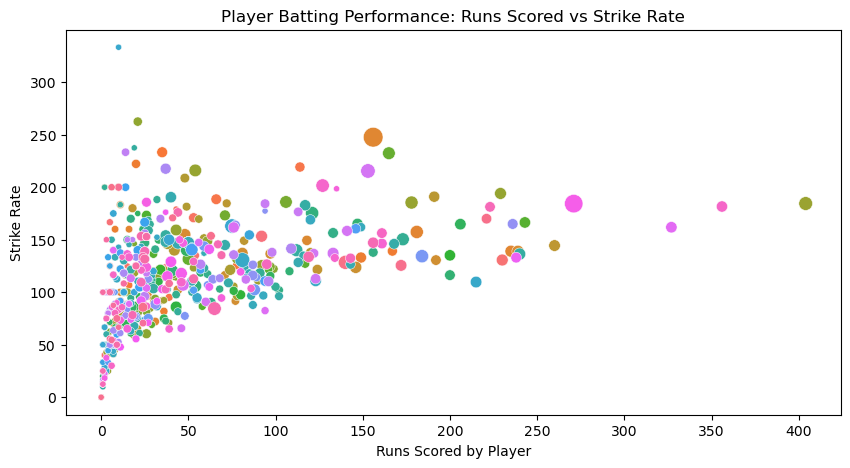

In [80]:
# Visualizing the merged dataset cric_df
# Scatter plot of Economy rate vs strike rate
plt.figure(figsize=(10,5))
sns.scatterplot(data=cric_df, x='Runs_scored',y='Sr', hue='Player',size="Batting_Avg", sizes=(20,200),legend=False)
plt.xlabel("Runs Scored by Player")
plt.ylabel("Strike Rate")
plt.title("Player Batting Performance: Runs Scored vs Strike Rate")
plt.show()

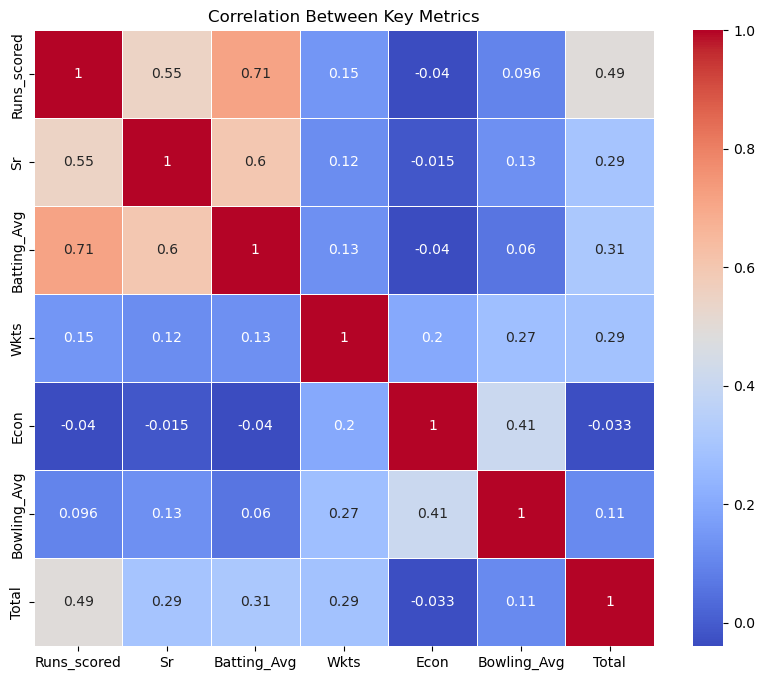

In [81]:
# Correlation matrix for batting, bowling, and fielding metrics
plt.figure(figsize=(10, 8))
corr_matrix = cric_df[['Runs_scored', 'Sr', 'Batting_Avg', 'Wkts', 'Econ', 'Bowling_Avg', 'Total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Key Metrics')
plt.show()

In [82]:
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat', 'Catches', 'WK Catches',
       'Direct RO', 'Indirect RO', 'Stumpings', 'Total', 'Fielding_Efficiency',
       'Keeper Contribution'],
      dtype='object')

In [83]:
# Batting Efficiency
cric_df['Batting_Efficiency']=cric_df["Batting_Avg"]*cric_df["Sr"]

In [84]:
# Bowling Efficiency
cric_df['Bowling_Efficiency'] = cric_df['Wkts'] / cric_df['Econ']

In [85]:
# Overall Player Performance Index:
# Weighted combination of batting, bowling, and fielding metrics.
cric_df['Performance_Index'] = (cric_df['Batting_Efficiency'] + cric_df['Bowling_Efficiency'] + cric_df['Total']) / 3


In [86]:
cric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               771 non-null    object 
 1   Group                771 non-null    object 
 2   Team                 771 non-null    object 
 3   Ins                  771 non-null    int64  
 4   No                   771 non-null    int64  
 5   Runs_scored          771 non-null    int64  
 6   Balls                771 non-null    int64  
 7   Batting_Avg          771 non-null    float64
 8   Sr                   771 non-null    float64
 9   Hs                   771 non-null    int64  
 10  100's                771 non-null    int64  
 11  75's                 771 non-null    int64  
 12  50's                 771 non-null    int64  
 13  25's                 771 non-null    int64  
 14  0                    771 non-null    int64  
 15  6's                  771 non-null    int

In [87]:
# Checking null values in each column
cric_df.isna().sum()

Player                   0
Group                    0
Team                     0
Ins                      0
No                       0
Runs_scored              0
Balls                    0
Batting_Avg              0
Sr                       0
Hs                       0
100's                    0
75's                     0
50's                     0
25's                     0
0                        0
6's                      0
4's                      0
Boundary%                0
Inns                     0
Overs                    0
Runs_given               0
Wkts                     0
BBf                      0
Mdns                     0
Dots                     0
Econ                     0
Bowling_Avg              0
SR                       0
Hat-trick                0
4W                       0
5W                       0
Wides                    0
Nb                       0
Efficiency               0
Mat                      0
Catches                  0
WK Catches               0
D

In [88]:
# Checking the total number of null values in Bowling_Efficiency column
# As We calculted Bowling Efficiency by dividing Wkts by Econ, therefore, checking the values of Wkts and Econ to find out the reason behind NaN value.


cric_df[(cric_df['Bowling_Efficiency'].isna()) | (cric_df['Bowling_Efficiency']==" ")][["Wkts","Econ","Bowling_Efficiency"]].head()



# Here we can observe that the bowling efficiency is NaN because values are divided by zero. 
# Therefore, we are going to fill na by 0
# We can also observe that the wkts and econ are zero because the player might be a batsman or fielder.
# There are 240 players who are not bowler in the dataset

,Wkts,Econ,Bowling_Efficiency
4,0.0,0.0,NaN
7,0.0,0.0,NaN
8,0.0,0.0,NaN
11,0.0,0.0,NaN
12,0.0,0.0,NaN


In [89]:
# Filling na values by 0
cric_df["Bowling_Efficiency"].fillna(0,inplace=True)

C:\Users\SHAIFALI PATWAL\AppData\Local\Temp\ipykernel_18276\3370084303.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cric_df["Bowling_Efficiency"].fillna(0,inplace=True)


In [90]:
# cric_df['Performance_Index'] = (cric_df['Batting_Efficiency'] + cric_df['Bowling_Efficiency'] + cric_df['Total']) / 3
# There are 240 values which are null
cric_df[(cric_df['Performance_Index'].isna()) | (cric_df['Performance_Index']==" ")][["Batting_Efficiency","Bowling_Efficiency","Total","Performance_Index"]]



,Batting_Efficiency,Bowling_Efficiency,Total,Performance_Index
4,0.00,0.0,0,NaN
7,50.00,0.0,3,NaN
8,0.00,0.0,0,NaN
11,40.00,0.0,0,NaN
12,125.65,0.0,1,NaN
...,...,...,...,...
755,564.72,0.0,1,NaN
756,277.80,0.0,0,NaN
757,327.30,0.0,0,NaN
761,675.00,0.0,0,NaN


In [91]:
# Checking the Data type of "Batting_Efficiency","Bowling_Efficiency","Total"
cric_df[["Batting_Efficiency","Bowling_Efficiency","Total"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Batting_Efficiency  771 non-null    float64
 1   Bowling_Efficiency  771 non-null    float64
 2   Total               771 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 18.2 KB


In [92]:
# Converting data type of "Total"
cric_df['Total'] = cric_df['Total'].astype(float)
cric_df["Total"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 771 entries, 0 to 770
Series name: Total
Non-Null Count  Dtype  
--------------  -----  
771 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [93]:
# Now again creating doing the feature engineering and creating Performance_Index column. 
cric_df['Performance_Index'] = (cric_df['Batting_Efficiency'] + cric_df['Bowling_Efficiency'] + cric_df['Total']) / 3


In [94]:
# Now we can see no null values are present here.
cric_df[(cric_df['Performance_Index'].isna()) | (cric_df['Performance_Index']==" ")][["Batting_Efficiency","Bowling_Efficiency","Total","Performance_Index"]]


,Batting_Efficiency,Bowling_Efficiency,Total,Performance_Index


In [95]:
cric_df['Performance_Index'].isna().sum()

0

In [96]:
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat', 'Catches', 'WK Catches',
       'Direct RO', 'Indirect RO', 'Stumpings', 'Total', 'Fielding_Efficiency',
       'Keeper Contribution', 'Batting_Efficiency', 'Bowling_Efficiency',
       'Performance_Index'],
      dtype='object')

## Applying Machine Learning Models

In [97]:
# Import Packages for predictive modeling:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [98]:
# Defining x and y
X = cric_df[['Runs_scored','Wkts','Catches','Econ','Sr']]
y=cric_df['Performance_Index']

In [99]:
# As our predictive model getting infinity values in y variable error, we are checking how many infinity values do we have
import numpy as np
np.isinf(cric_df["Performance_Index"]).sum()

1

In [100]:
# Fixing this issue:
# Replace infinite values with NaN for further imputation
cric_df["Performance_Index"].replace([np.inf, -np.inf], np.nan, inplace=True)

In [101]:
# Replacing this NaN value with median 
cric_df["Performance_Index"]= cric_df["Performance_Index"].fillna(cric_df["Performance_Index"].median(), inplace=True)

In [102]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 771 entries, 0 to 770
Series name: Performance_Index
Non-Null Count  Dtype  
--------------  -----  
771 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [103]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to X_train for the intercept
X_train_const = sm.add_constant(X_train)

# Fit the model using OLS (Ordinary Least Squares) from statsmodels
model = sm.OLS(y_train, X_train_const).fit()


In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance_Index   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     124.9
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           6.24e-91
Time:                        13:08:12   Log-Likelihood:                -4852.0
No. Observations:                 616   AIC:                             9716.
Df Residuals:                     610   BIC:                             9742.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -162.3697     56.513     -2.873      0.004    -273.354     -51.385
Runs_scored     8.2836      0.637     13.002      0.000       7.032       9.535
Wkts           12.8968     11.819      1.091      0.276     -10.315      36.108
Catches        -5.0606     24.108     -0.210      0.834     -52.406      42.284
Econ           -2.5214      5.423     -0.465      0.642     -13.172       8.129
Sr              4.9332      0.510      9.671      0.000       3.931       5.935
==============================================================================
Omnibus:                      902.036   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373391.144
Skew:                           7.740   Prob(JB):                         0.00
Kurtosis:                     122.616   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As the p-value for Wkts, Catches and Econ is greater than 0.05, therefore, these variables are insignificant to predict the Perfrmance index.
Now retraining our model with only significant values i.e. Runs_scored and Sr